In [2]:
using Distributions
using JLD2
using LCIO
using LinearAlgebra
using StatsPlots

In [3]:
@load ("TOFsspion") TOFsspion
@load ("TOFsskaon") TOFsskaon
@load ("Momvecsspion") Momvecsspion
@load ("Momvecsskaon") Momvecsskaon

1-element Array{Symbol,1}:
 :Momvecsskaon

In [4]:
pwd()

"/afs/desy.de/user/a/albertal/public"

In [5]:
function getPathLength(p_transverse, chordlength)
    radius = p_transverse/(5*(1.602*10^(-19)))
    s = 2*radius*asin(chordlength/(2*radius))
    return s
end

function findTOF(Momvec, mass)
    mom = norm(Momvec)
    costheta = Momvec[3]/mom
    energy = sqrt((mom)^2+(mass)^2)
    v = mom/energy
    if costheta < 1657.0/2084.68
        sintheta = sqrt(1-costheta*costheta)
        v_transverse = v*sintheta
        p_transverse = mom*sintheta
        pathlength = getPathLength(p_transverse, 1.25)
        mean = pathlength/v_transverse
        println(mean)
        return Normal(mean, 1)
    else
        mean = (1657.0/(costheta*v))
        println(mean)
        return Normal(mean, 1)
    end
end


function findTOFkaon(Momvec)
    return findTOF(Momvec, .439677)
end

function findTOFpion(Momvec)
    return findTOF(Momvec, .13957)
end

findTOFpion (generic function with 1 method)

In [ ]:
xvals = collect(2:0.1:30)
yvals = pathlength.(xvals)
plot(xvals, yvals)

In [6]:
#testing kaon likelihoods
Distpion = 0
Distkaon = 0
kaonlikelihoods = Float64[]
for x in 1:length(Momvecsskaon)
    Distpion = findTOFpion(Momvecsskaon[x])
    L_p = pdf(Distpion,TOFsskaon[x])
    Distkaon = findTOFkaon(Momvecsskaon[x])
    L_k = pdf(Distkaon, TOFsskaon[x])
    kaon_likelihood = L_k/(L_k+L_p)
    push!(kaonlikelihoods, kaon_likelihood)
end


1.250309485328267
1.2522003601474216
1.3277399641522878
1.3574365281262237
1.3224415384041155
1.3254196289339042
1.7115455936454917
1.7432484344256753
1.3167914743301323
1.3199557889466758
6404.38714765838
6467.492689185088
1.3950328982359372
1.4627165181397768
6338.200598664809
6391.773643970541
1.2877130698000647
1.322398954989348
1.3449616103745106
1.348112033287306
1.3805350760085213
1.4426492245611469
1.9576639513493561
1.9601548556506685
1.6381029118002428
1.642374613113555
1.4906287877727507
1.4967431507525686
1.4381772408639226
1.4456283245075765
1.266997090148609
1.290888544711789
1.839539364300476
1.8639668641593552
1.252471318917592
1.2555704415139226
1.600542438439326
1.6542834612593165
1.7890246194653985
1.810556624758104
1.2521731306953794
1.2541223665257992
1.3232819011536574
1.4226531456689022
1.3579510669887622
1.3592048785883655
1.3691551416659418
1.3709090487764615
1.8543064821278281
1.8631342437321177
1.3073685773639723
1.3735191565831049
1.5297602952345106
1.531544

1.251780347366231
1.267481421646806
1.2987277105905115
1.3317863819605993
1.3455462216311853
1.346779490852153
1.312189616076303
1.318398412138002
5595.064916473125
5661.578479937916
1.2565882313262706
1.2703419994648033
1.253897301192107
1.2573439903353796
1.2517521664816151
1.2535553865401867
1.8633527803722074
1.8664623879571638
1.256186773571365
1.3040387027625733
1.2974041430045455
1.3001530501194247
3.3846642322865383
3.3976908795231027
1.2630922092757555
1.3259692501139717
1.3425810227180863
1.3449878954010572
1.4790488406935463
1.4804643605990244
1.2832047907530038
1.2848310244552668
1.3873384106371116
1.3936038368399248
1.7189094866843402
1.7339777837971522
5664.077008991432
6287.057927435687
1.2787837957981263
1.375433666429677
1.3505669019054234
1.3670274636342301
1.2736318090235135
1.276761671316113
1.2555767442701105
1.2643442813871406
1.418701294921933
1.4236834073934483
1.4315477627508726
1.4872558460526208
1.2924612318961128
1.2955325133010716
1.2598320546104242
1.30388

1.5461069457626258
1.415164205997427
1.41695814350618
1.2517814704360732
1.254872900753825
1.512769807422664
1.514325999491625
1.345281855937195
1.3714694492686241
1.2511978067580756
1.254004447463799
1.3344128875833803
1.3990449077058469
1.8535656369053053
1.8665653328774896
5706.9630240777415
5865.263553725288
1.8609730448251338
1.8690248058391854
1.2589792213599587
1.32539182297623
1.3035349250120138
1.3090195415947552
1.4920508654344062
1.4936108123020357
1.2519799032899268
1.2535225281813627
1.291246556706727
1.297046530440003
1.2523336939290888
1.2538809077938884
1.6164438550513087
1.6308827644968118
1.2525994076665008
1.2694224114603823
1.2513777542122995
1.2553316831256
1.51988508505035
1.5280641170993825
1.4023610255263885
1.4039119030441365
1.4362819071658375
1.4377851295163708
1.260956832551272
1.3445296689338622
1.478670343233393
1.4917774439639389
1.261877596805219
1.305299632833956
1.2673110700811983
1.2704541023723848
1.2534849633758258
1.2580831044466954
1.5010315696814

1.2600873670963473
1.283858848633723
6062.026427691714
7165.049656861989
1.381599061199023
1.3830868666905676
1.2667251229815752
1.2906839121656228
1.2858932834379913
1.3467821087446328
1.5146700704946099
1.5170611899432263
1.4901684436985625
1.5097377148436113
1.5625850451494712
1.585332495672219
1.2559054355809733
1.257033719535135
1.267993120612682
1.3357126377736048
1.331456420874967
1.3404365680907095
1.807366705646423
1.8113511392754158
1.3231378506053355
1.3252229420196773
1.680330554032445
1.684633644246294
5792.714074307298
5849.031740778698
1.3119279323287225
1.3134444496466893
1.7096671929425207
1.7225140244801334
1.491564077095768
1.4953245669902258
1.25606819291615
1.3010195127434885
1.2689567740642138
1.2704937439308022
1.3518204985265196
1.3530730394677108
1.2530246761076567
1.2589197531809764
1.3553672840523145
1.3649101543487643
1.2638118167522068
1.2735580842999195
1.2673885138775796
1.3070095046099137
1.3925301828112973
1.3999918998073329
1.2527745504016659
1.2650580

1.6253584546223876
1.6270407838355294
1.264669867993608
1.2910910299901255
1.4330433194304248
1.4456145616253866
1.5098939346403855
1.5187196803553054
1.4569093054756677
1.4701415839545995
1.2953725288138778
1.3934473058157208
1.253347514157339
1.2825302785458457
1.2894414959894058
1.309331344090199
1.8810821109716391
1.8843758615534167
1.3513334836107407
1.3803679570886556
1.4162122780400244
1.4183238820703943
1.3509550201445975
1.3995231057247497
1.5218025222133225
1.5354791237878673
1.2519400067373228
1.2534283739014755
1.4111713942358581
1.4241658338383447
1.2849551496962885
1.289355408775168
1.3752282678282455
1.384487329854765
1.351962102095313
1.354621799650421
1.2713293738143159
1.3276245378395755
1.9102363057638316
1.9279890648961449
1.4652247522815678
1.470513969687746
1.2755904575643242
1.2780093933645211
1.3189188030825
1.3234014298306775
1.5738996891919304
1.587421335276588
1.600955498726715
1.6166174732166696
1.2506018031469321
1.2557555839970238
1.3542106337896846
1.3620

1.2548185663394402
1.5131225691829073
1.518242343363152
1.3249342141495075
1.4085879263888665
1.3930195577394442
1.395264934263583
1.2827737349055541
1.297947239376779
1.3082773451546674
1.3576310650560175
1.2626045845666145
1.357441431801995
1.3291963151183137
1.349451078069859
1.3106737114380855
1.3146678723830714
6603.121689999046
6618.765389480311
6563.828172506128
6724.4759547154235
1.2579799649139192
1.2605170329439779
1.2899283762171212
1.2986426800176094
1.253963850696379
1.2639100938995862
5599.860930816726
5604.996809672955
1.5568616489030858
1.574505712804479
1.9158190262146721
1.952421169581138
1.2521202905387867
1.2544170010561453
1.819708991362367
1.8228379673998791
1.264275210829714
1.2656449811052608
1.8078861140254103
1.8106482688961234
1.2658569025338757
1.289046064358608
1.291969983901946
1.2939009985557925
1.8437930430213665
1.8992465887173786
1.3641588272954308
1.3676595457543848
1.2789925296270535
1.2916986046279777
1.270134821577394
1.3003671842227378
1.299151026

1.9457021954639837
1.2591912426901006
1.2618102284998982
1.7444543581503937
1.746535252242815
1.3760039814439398
1.3795597044647816
1.491536565240893
1.4943865830425072
1.8536993688557044
1.8619720451888895
1.2526559949820946
1.2613368710309008
1.4180341720463343
1.494170917868127
1.4697414608601724
1.4711185410804875
5638.841608630531
5644.016816263697
1.4526806215903125
1.4593641289741746
1.3185439471316946
1.3197790887049488
1.364258776825712
1.36549569097462
1.3071686390893305
1.3756438078672237
1.2587229050897384
1.2771730865114463
1.2525375219374313
1.2733084138626922
1.5218038825438287
1.5612184020677795
1.3514341152926719
1.3547581220492908
1.3097832074045614
1.3166488734743742
1.2893640108212836
1.2914046219800963
1.277810861266522
1.2841619217725462
1.435698478221688
1.480733339639909
1.7995008766980065
1.8095086961005604
1.253622740147843
1.2682799942058096
1.278649968542494
1.2819500904168666
2.059459483130628
2.070761164523944
1.6377138184819737
1.643932679470206
1.2738770

1.2750028961768203
1.2798147167962481
1.256963693742512
1.2750332856735709
1.3236322083020027
1.3467414552775874
1.250252625905195
1.2516668117782512
1.8631748948293991
1.8666025140117863
1.303726169998907
1.3115185618408975
1.2586567579708645
1.265103382221831
1.2501883553332167
1.251393478242988
1.360010657167066
1.3693037778517627
1.4907448475027498
1.4986012562186408
1.4660558626367828
1.474884727808049
1.9156381225928094
1.9546289927269922
1.4646708168467928
1.4696547380054956
6694.444382235578
8126.743544170241
1.6458228297618724
1.70333471691923
1.3197658325383876
1.3260814617627952
1.7893340404314326
1.7934220236091494
1.417716113203769
1.4497707229698864
1.531154481990972
1.5480239395979045
1.8360188055206166
1.8490640203604398
1.257499556508794
1.3040647489584285
1.2540718518727927
1.2561964775292667
1.2573383810336716
1.262533230821554
1.7827894478036834
1.787578307288237
1.253709649064376
1.2629027219952464
1.282189315423156
1.2852210082322721
1.2527163542075392
1.254149003

1.4246649119220522
1.294040780848418
1.3257137272812085
1.4583974203907473
1.4619748706653586
1.5134083146181407
1.5174310150823331
1.2545078640342986
1.263691026314817
2.0339227266869844
2.0462068165567784
1.9575628277212427
1.961004918880496
1.31541931955379
1.3166628848587691
1.3666923910156856
1.3689671897960172
1.2690659792156203
1.3317254465262338
1.2536064627875378
1.2837049076964697
1.5140722123008556
1.5571465170483987
1.4949880288937631
1.5302578264666977
1.5974472334901046
1.6240060527819702
1.303073415341293
1.3043988793816306
1.2567615402123953
1.2756664646468632
5623.6957583817375
5820.022794067808
1.8150894702106033
1.8262301921437212
1.2535570806532292
1.2812761130214645
1.271577202521448
1.2735593247859673
1.9581668020965506
1.9731417368416673
2.0436293466527498
2.071680487642067
1.366476955292447
1.3678481656517971
1.6422632687696714
1.6446223535484419
1.7848079212636956
1.786483908324877
1.632212847438373
1.6374861114924097
1.6132715897125929
1.6370787859392215
1.254

1.3878629524202188
1.5707564031641654
1.5771136327399535
1.590027689177367
1.5946726891787353
1.49473263763912
1.5144076593930278
1.3931912219591527
1.4000897187427808
6375.2873297931865
6384.225314669748
1.2785395101757628
1.2864063757460897
1.351569960360037
1.3536227902871227
1.4751632930868794
1.5487001793245616
1.2543197804040347
1.2577242532249715
1.252200860290623
1.253775894763387
1.4179274424438324
1.4288540788724076
1.3743462740095544
1.375607645689875
1.2750770167450038
1.2765056534912085
1.7997920076021225
1.8138942296646214
1.2586532853845558
1.330829654898303
1.3817521633984289
1.4029104375236767
1.2553452583174243
1.272364712730503
6979.57267421621
7343.028573448752
1.2903978173988517
1.2982314533526602
1.3611882784228737
1.3644111992289476
1.2628439660215613
1.366239944175847
5592.085180002035
5614.636763889012
1.261047702135991
1.2745283146845505
1.4710252425136876
1.481300027599789
1.4455869139940711
1.454505545860886
1.3132129077994072
1.332699450167203
1.28107502802

1.8735580789805566
1.3119487345583962
1.315963349960766
1.2527615494577018
1.2734779872022612
1.55387172582195
1.5552681889951177
1.7601077833529832
1.7645549235415174
1.4792841544073578
1.4923795712736911
1.322067004571478
1.3828937886588424
1.3825181979256813
1.3914333877916027
1.3153917639374526
1.3256999609066997
1.389275515819412
1.4019845872962995
1.3922237053652833
1.444075528122913
1.276994158982802
1.2851163944541533
1.3069043473704984
1.3656327657771674
1.2546435615550209
1.2561641889141768
1.453646090437498
1.4785812439814872
1.2530682266327595
1.2547076536867392
1.2644289416260117
1.299479602633178
1.2530557734735026
1.2799584362385976
1.671778363016867
1.6949868726603858
1.316456479607909
1.3723854706088368
1.2914811316925943
1.3002531680682776
1.334683845810861
1.3559644295473365
1.2695583872256353
1.2807693173289476
1.4594759572618297
1.484957260067617
1.5620984959765467
1.5785056828023876
5881.392586513508
5988.550754219718
1.3028708454656819
1.3172149155546944
1.456541

1.383027126416923
1.4214598772663882
1.4463566762990567
1.4814605033844308
1.4120962011823461
1.4152923114508438
1.6822918497181294
1.7071406032716598
1.2544789853297482
1.2935239886949268
1.7315212614634807
1.7419001561522407
1.2895621925256695
1.2973575281342322
1.6047858349866344
1.6082319943288563
1.2554854605358328
1.258373653625797
1.257590217075811
1.3087369092994388
5844.5409724748
5890.135663119505
1.4152480149151325
1.4597287057171193
1.4661734776297557
1.469042528807105
1.2701665127875803
1.3317458732594407
1.3256579177430787
1.3299130489690092
1.5909937431289267
1.5928708275162575
1.3646363918219546
1.3812005055426262
1.6927878059554131
1.774720992179993
1.2598078848818777
1.2883053466695502
1.7863833317006972
1.8391817376639155
1.3196946369733946
1.373715163110756
1.2960962126803086
1.3417070304652288
1.2701209987423532
1.273763121792871
1.2698266778120761
1.2712116972217369
1.3732781517276507
1.4024614341746062
1.3070667766927357
1.3090071592998074
1.2536871645478904
1.27

1.4018144588254673
1.4241159767559686
1.2598945500332044
1.2702808879656258
6179.4704879490655
6229.1882766760145
1.263045513193891
1.2667122075610373
1.5704130861182004
1.5785740141112232
1.7016594388679525
1.7125584386239252
1.2676566080239056
1.307597022127556
1.4860651774450317
1.4958104233104261
1.2899363822298426
1.300782578577984
1.3002468495763888
1.3057116019473187
1.696390891565871
1.7621901880316748
1.2765944386570358
1.3078322503000606
1.5313910275848754
1.5329391116440132
1.2567875214368536
1.2743584302062902
1.6824195044732322
1.742634597707003
6662.250462308507
7575.426179955507
1.252372298294797
1.2565558695153254
1.3727484260305178
1.4020103609333905
1.336808469399217
1.3383153846817282
1.2505727788945193
1.2553203258522028
1.8371296826191372
1.90817687867921
1.3264527684264222
1.3320734422979972
1.9615444665631552
1.9637693105078835
1.5771819742565973
1.6224240282162792
1.66126998387574
1.6652940014456428
1.3044846138330026
1.307086481446164
1.5822282047226441
1.66283

1.304391597912316
1.3211713156354052
1.3799900591846057
1.381513502076996
1.465450362748062
1.4959905231337
1.4154780343331785
1.4436662642942126
1.257291774671422
1.2807170857672356
1.7818644048445467
1.7853841263838022
1.2642275908901937
1.2675773520250249
1.2502490829997674
1.2518318686229077
1.3025659624025452
1.3975070237207148
1.2662731002378569
1.2871180458386164
1.4613884085078608
1.4630607747302617
1.2716324407868516
1.3031168457219646
1.660007831050515
1.6953524912612739
1.3996117880423131
1.4100439269587053
5678.999438995557
5686.002604006058
1.3250918697385596
1.3293058554081063
1.4067516042925392
1.4094963081733192
1.3653889045209402
1.3767730857056555
1.652205449750755
1.7042787767702838
1.3004228569111058
1.3029759519032478
1.7894334611427216
1.7913660079438407
1.490963747914287
1.5097416169012299
1.477590318270967
1.508796924403053
1.3524656442814376
1.3657708096990695
1.4497806922151066
1.453455754750207
1.645913993628351
1.6487437240948077
1.2950568210279505
1.3186343

1.251438768947416
1.2638071662216463
1.753080932597753
1.8183074828116215
1.403231942072532
1.404922583409128
1.2538179546279336
1.2834250976011414
1.4839024071054057
1.5146578301828246
2.0029883120430894
2.0152303730215246
1.3744334485387117
1.382675905424351
1.6235216943671944
1.6298398060420436
1.4018474147363469
1.4404424538485634
1.455236494151554
1.4796815046353338
1.2525524225290139
1.2649760491017639
1.5065615259590925
1.512708513670724
1.2960344994003714
1.3084075869435696
1.2741112879274892
1.2753215563335
1.3215731633722065
1.3439255642704324
1.2852298167775074
1.3002814793135842
1.2641798533826618
1.2659066230357885
1.2522902177980602
1.2723657149750522
1.270805084533993
1.274014751936829
1.2764720643675143
1.2785416534438503
1.389538513330595
1.3908782559890476
1.4119573073765914
1.4177154984252847
1.2758938152965795
1.2911586852457473
1.2602023583881985
1.2664569419481637
1.490217192887097
1.4938364992307296
1.5885362044129765
1.610233159178291
1.26513871300267
1.26693706

1.2529333555285183
1.3646432948392881
1.366804412860627
1.7568524614172114
1.75998186193792
1.4429385999357132
1.4448704009927533
1.2566676875608365
1.259028284062765
6155.126523240306
6407.170974428676
1.251941139466408
1.2643590281016859
1.3467539736105048
1.3490357376542528
1.3228473285019409
1.3596885573333386
6013.428946802058
6070.560931491797
1.3407505325397067
1.352005796416922
1.2501917438307013
1.25182868431582
1.2959765300298212
1.2998836198242294
1.6611070326158448
1.6636254192114002
1.904162372260003
1.9124562592916854
1.269268426728932
1.271117614917801
2.036851953569452
2.052651107120098
1.2617346968703194
1.2646668068122384
1.259727741575369
1.3256207186577653
1.3097245671306452
1.3126721803411454
1.9155795294088338
1.9247943266480696
1.9262896238152074
1.95653169331176
1.2563033625217903
1.2887731392063904
1.5383238649283557
1.6157623877718357
1.5878428667408802
1.5925773511336039
1.4350748959187711
1.4370715659978037
5934.115289423847
5983.282901888003
1.2604540248963

1.7083566252121725
1.7239196559415275
1.2924506500190807
1.323057515928597
1.2518519482351538
1.2600116917599784
1.316150195584218
1.3175786343947715
1.5414794288023714
1.5666092863278236
1.3518368918962822
1.35438388440738
1.403355090772501
1.4093472747764497
1.28796848483937
1.292083290622316
1.2568985780977517
1.2616363911803963
1.5089655744482973
1.540996070090182
1.545368517606217
1.54830376445793
1.8784869865054066
1.8836950547956288
1.2540071542543991
1.256909845314886
1.2517413276236757
1.2602371881949654
1.3170966455606739
1.3262369463403263
1.592892030909107
1.614363889559923
1.5248444573329425
1.551184505033384
1.3163326887856093
1.3320831169118612
1.3461374572510123
1.4404203181511128
1.3756679660704136
1.3769104740132976
5900.813114147611
5933.957869101064
1.4792652372823236
1.560251475119409
1.2653312775990344
1.288531926149964
1.2527950475328844
1.2608437842428213
1.2568051386375083
1.258041820242306
1.2796432770702624
1.2834584647022955
1.415457866654868
1.4177891271626

1.5614179332864033
1.2890770473443987
1.2919749979032737
1.2776837051826984
1.2791348811469265
1.9349866484041651
1.9715992366806367
1.9011114971085357
1.9201318715612323
1.2505853821385169
1.2520662430771738
1.251804926338098
1.2541687388639733
6383.135880461361
6804.15709979771
1.25535841143546
1.2571818396507364
1.2507505567948474
1.2518984877641137
1.477052182024772
1.4886112050167444
1.257016351924303
1.2590721702699181
2.00488830511052
2.0080322201034932
1.3630020568666625
1.3660610822549994
1.589469667851341
1.6051134505918891
1.2728077421565862
1.275972494350866
1.514537810527556
1.5988813052509556
1.7140007210054542
1.7173866660531303
1.270006882031816
1.334415781493526
1.3287127410096522
1.3659109768976312
1.7193191383292894
1.723112293492387
1.6697197574697202
1.6846220593903514
1.4985652932911044
1.500925343343564
1.518033035882699
1.5347725747242909
5618.944653028128
5694.458963613459
1.2601956119247306
1.264003555725007
1.3817842708252712
1.386321994324488
1.4252394643790

1.3114453921773652
1.3188839658498954
1.265416231376089
1.3610720331190251
1.2552330520430053
1.25666557156651
1.4211805462749962
1.4488263383330988
1.337984896797461
1.3398725456773142
1.9083178866808472
1.9320212136691615
1.303585252504953
1.332569041029168
1.489685688874673
1.4984539151012222
1.9031669766240178
1.9065280116426984
1.459521447697958
1.4766112084535004
1.3362974339092888
1.3381784849226726
1.4940828103617405
1.557039282877626
1.2592659812681513
1.2746968788615498
1.3671571278067214
1.3900401110559006
1.5802553689458971
1.652369138159358
1.7390182456735337
1.762335548522475
5978.831507016441
6012.7702898737825
5710.264906582654
5858.585448673081
1.3682513367952198
1.374830304977525
1.3945863556225102
1.4449450799350994
1.3725788991914407
1.3926073188917614
1.5835423834052937
1.5920011505169154
1.2776508920543463
1.2789895857891835
2.018379604417803
2.036096273019305
1.4458550792072675
1.4553806315108055
1.3869372027917772
1.4284461086449969
1.270325857639478
1.341813039

1.4205257022547872
1.4222139192508774
1.2619299260815673
1.341564746961775
5921.115796206878
5931.717289120095
1.2668355909219058
1.2735748472911463
5784.38581862329
5793.78784595476
2.0306470034360506
2.0343873870992604
1.3859687333811224
1.405889332533893
1.253451340282333
1.2747510940048523
1.5300779445249442
1.5417594419230247
1.3619451450537285
1.3722677570532211
1.2648700327281852
1.2665498944465143
1.912741957332596
1.9167581203276942
1.4347946677276517
1.4472512379187679
1.8260396768527654
1.8373956312849111
1.6027912139721936
1.6866938167075975
1.328637352507999
1.3783919824890642
1.4240934902394846
1.5151348040810235
1.7166238435240917
1.7187751132943612
1.3025835181616512
1.3525949394215337
1.250894508177635
1.256036774489368
1.3228080510195166
1.3301274248056885
1.7689952246984721
1.7709692861836763
1.2763580881730854
1.3134408573381888
1.6734170295230153
1.6806666596315487
1.2606908672503585
1.2639916416838395
1.998142320895058
2.0060344308786324
5942.689755848239
6082.224

1.2643246218788446
1.250465755674546
1.251705348900047
1.2738401933008374
1.277206300335113
1.2685060001379493
1.3116446804287998
1.2512855207215987
1.2529234033762946
1.2870793908515885
1.3313142838682113
1.2505690296789516
1.2555433235523479
2.177009715613758
2.193803355809694
1.2568304083226862
1.2582210211562446
1.3761254325193393
1.379125293865743
1.2550041497110649
1.263018637428312
1.2946755832538903
1.3407680004730946
1.517075361026103
1.5213974904839813
1.2502245966900278
1.2516795353553676
1.2838677910644527
1.2953678321343907
1.2788293340165475
1.2804106250457723
1.341459142162636
1.3634485076324963
1.2613644863361164
1.3071813170477342
1.2741981760281158
1.2846494887882083
1.2699658964234426
1.3818343106515487
1.260605633263214
1.2636564359041291
1.250618917607921
1.2557263467509605
1.4988609294724435
1.501322903357888
1.4418566070765442
1.4515536759905434
6740.636429985364
7535.426865131752
1.7324867750997448
1.7701475327515865
1.657802405736058
1.6758686683867015
1.685423

1.2507436353472046
1.2526931942408426
1.2747593436313134
1.3594768342761399
1.8273970684622987
1.9019891463216447
1.2837114628371908
1.2935575943810076
1.5447911573830884
1.5472427245092706
1.278920954504056
1.2801403263089133
1.4616843008095286
1.4700978868710184
1.255146671017002
1.2569107729824525
5807.826786865439
5822.198380428681
1.5518290883539323
1.573523448732857
1.3644892317084916
1.4661957361221978
1.4092236669499634
1.4177071404976969
1.3362854933315949
1.3491247127937402
1.2759843957846402
1.3639041355305204
1.2607006731561023
1.2619322605789673
1.3091399464085587
1.3924347726390494
1.255639432835882
1.297053922469553
1.3484340644941633
1.3601251933813892
1.3565295670347666
1.3782109868012375
6134.740372856714
6157.192780807443
1.3242966118479897
1.3596892060114187
1.3680461710984595
1.3731374695329526
1.5089795343257832
1.5201853877019507
1.2656866455285187
1.267003055096758
1.8937606124268709
1.9051951917026375
1.3159844219018422
1.3498788883696984
1.287656535672718
1.28

1.3111065005555518
1.251217871465915
1.2536498846354485
1.2589222539428966
1.2816781703360252
1.3446745475532564
1.3515054633200323
1.651691623510339
1.65383588175676
1.9048199961022514
1.9256109309632883
6793.483089935255
7569.7867410217905
1.9970445380948643
2.000528152932506
1.2553818843723423
1.2979189655329997
1.3984037013387203
1.4500034319097201
1.2865452406029223
1.3127854774458432
1.2548524823121927
1.2663600631660406
1.2826612883027622
1.2838591902794645
1.369369982367222
1.4591322766539403
1.8390945791808468
1.843427011032209
6027.349885300463
6067.0626592640565
1.5565133492855647
1.6130189599988323
1.448101149332311
1.4585622249958994
1.5254252262422188
1.5409740906585228
1.258988780200029
1.2770558089963746
1.3165597982412371
1.318431379790475
1.2624466168643618
1.3424623906793813
1.6761560492469125
1.6822080635763936
1.263916262022244
1.3684839745039146
1.4169784268586247
1.4238150355831578
1.326600573467281
1.3279531625931695
5589.697433494712
5668.861201032479
1.3211681

5861.424812407654
6088.894002101361
1.9460132182129468
1.9497751935664607
1.2923328940420755
1.2945046068618609
1.3738514249381344
1.3751835700960031
1.325107515077293
1.3279526258925356
1.2804008638977158
1.3023822394052922
1.2515352301910097
1.2533413080926077
1.3059241058714368
1.3092209333618805
1.2985510818698007
1.3002426152004893
1.308024471989121
1.3982356952562767
1.6973103877830809
1.7074072429292564
1.3350719536042222
1.3449384315204507
1.2930934598539812
1.2962891621502073
1.4034955507572842
1.4216319109150715
1.3098103456750936
1.3318644759998717
1.3105371362329306
1.313765000937665
1.2619712657119324
1.3296317583223272
6707.256921393786
6715.713675048408
1.2671067261372948
1.2683495321993399
1.250641530952001
1.2518147209748194
1.4045781079251431
1.4101101651544428
1.3952697178649756
1.4013265845238387
1.340413857971219
1.3553797639397818
1.2591369905892282
1.2610145125352934
1.3722835077267923
1.3778368252820572
1.255575411679277
1.256911081102722
1.7275613053770027
1.73

1.315602097089901
1.28695077919322
1.2903344960828556
1.8717779103184435
1.875349913925827
1.3222569081088817
1.4037048014057554
5998.995861424206
6130.9486933974795
6246.202122156115
6383.728668796946
5939.847576852927
5956.6554330271
1.2607499745257373
1.2634476034026725
6068.9150224278255
7144.291938408518
1.3335790989387177
1.351939015464173
1.3023192183659844
1.3325409484171327
1.497914646929108
1.53862271323199
1.2693905978150484
1.2718102094653405
5833.769214805982
6271.535593771241
1.2716584688571593
1.2727754877301247
5727.813758363217
6008.784823285411
1.2562079594480626
1.2888622811066233
5973.613189449055
6070.304292971556
1.3267746863760945
1.366729592134176
1.2685892192014234
1.317151958916689
2.066678048894789
2.0818519496681684
1.2746721677026027
1.338324944125097
1.4923833363884462
1.5121336735354405
1.25094269356497
1.2593232700218606
1.3189152933019157
1.3208239896376166
1.25908973639576
1.2608375870692399
1.251709740713877
1.2569872082227593
1.2512216277166717
1.253

1.2513463750179878
1.2626997238316606
1.7085453034939855
1.7135570295411486
1.2571140868998525
1.3142743967322075
1.7039684570319447
1.7345069979242556
1.86342469918931
1.883104135249585
1.5876376245492398
1.5905537669171332
1.9906959989822552
2.0010878160186816
1.3098006299979852
1.310980327998062
1.4750530360135667
1.4987266979684413
1.585669750952394
1.5870834264230713
1.3473685735817775
1.3553489780852523
1.5581257272756495
1.6200722457752095
1.253483792416802
1.2777423686975475
1.8090435517432277
1.8454791022272572
1.7701458875274967
1.7864758918136099
6391.978335187671
6457.614726144624
6686.212211309562
6699.044679187801
1.3996541243528502
1.4343416025205433
1.6971755835979756
1.6996901990981528
1.2915252017909735
1.312934766041489
6944.968672599149
6951.584809104985
1.3477876158758828
1.3515356939954104
1.310004938107551
1.3264687828204274
1.271218462933877
1.3110700737730225
1.3351945438921822
1.3662146900806391
1.2581635727753357
1.2599507209723906
1.4455528144050167
1.527044

1.5197362398071395
1.25389690164732
1.2686323904419912
1.3663149461562365
1.3719524399500203
1.2813941530197124
1.324813790580502
1.2517310183478993
1.2669690327382244
1.2656837978641684
1.273772297149738
1.4040070526198056
1.4729125614181025
1.2588416219885432
1.2672889626142687
1.2957129494929434
1.307751457666717
1.381486645959325
1.4120702935613623
1.5029470334654111
1.5225574886666395
1.2563366227657216
1.2665243784231952
1.2538856674638141
1.2765799737911514
5952.9985937299825
6146.984836659458
1.3993387103112256
1.4786621860203717
1.4535411263641103
1.4627407758365545
1.2546687796107536
1.2655857693501076
1.5165351512917997
1.517926877324105
1.587703608584757
1.6024717059190496
1.2513206152719898
1.262848307667849
1.3251470027689571
1.3266982981635984
1.6656518243091865
1.6905516080743743
1.3967678157876282
1.402076316505434
1.4386472855180603
1.4458220141808427
1.2981890911295555
1.347364410891766
5863.927473300668
6107.195579867271
1.3108372185468162
1.3153030256866185
1.36897

1.9549905459197536
1.5992521408718348
1.600845354013401
1.9129264413830385
1.914622803932508
1.5680231248040297
1.5709267265286095
1.5605670972976484
1.570627687541159
1.2675235865341712
1.3343246951877235
1.3875349376720094
1.4454550405175561
1.4070770926065623
1.4371990637188494
1.4705474074436073
1.4755959876906433
1.2567337305974395
1.2610977670784738
1.525594983665308
1.555411853550344
1.3063872899136444
1.3547088692783418
1.265989925447737
1.2748478836046064
1.3236364552402657
1.3273890758770905
1.8628293360465158
1.8658077245329632
1.3933618919923907
1.4203472111506512
1.2713756409953059
1.2725796736558292
1.2677827603349365
1.2850350340998367
5582.19027986862
5619.259861842872
1.2767919820189657
1.286177222010965
1.325116263435848
1.3279938989222895
1.5318463484691294
1.5544952815220852
1.3788706940014586
1.389610112995915
1.716368167155244
1.7232008193524404
1.5397158273213205
1.5752894269308402
1.2589497585140852
1.260392278230529
1.5112984117870494
1.5143899833725947
1.25726

1.338435363116419
1.308888732743349
1.3518612200488727
1.2561012675163208
1.259596071441871
1.3664185569302805
1.4009147750188429
1.427271190102814
1.4844293986066788
1.2653099184446246
1.3419263483930728
1.2924434915171605
1.3157371346771256
1.393657210482943
1.3953581182117227
1.4690161647417637
1.5473714045596534
1.5476188145968475
1.5555021801045699
1.2915653597666277
1.2935385888260287
1.3258427533143209
1.3324078986175096
1.345364060574943
1.3723698474605188
1.3029905082033695
1.381942631623505
1.2576795441108584
1.3074054887178974
1.2556222434075772
1.299519158584461
1.2927216257234413
1.3066768204562638
1.789525479765738
1.7912266528617513
1.3972152531512774
1.4055046136254923
1.3853255728746352
1.436388876704337
1.2510275691495427
1.2555689650111481
1.3545425937977447
1.3966975735307838
1.266398740915106
1.2893050179755943
1.2502029751534114
1.2513896840521508
1.2594757474599823
1.269711019600988
1.2612426422199097
1.2645892284209468
1.253911789723374
1.2699836193191525
1.2596

1.6505998509995372
1.2633727797894239
1.271259038825879
1.2660267365464266
1.3328985044565513
1.2511458565700837
1.2529361568779338
1.4539956452291605
1.456427766939377
1.4558533177469648
1.4590496929029972
1.2665309217619698
1.2681965726483242
1.8910987071009702
1.8966740255929653
1.6952468253430035
1.7021783067185967
5929.202044844439
5937.937197949652
1.4173451988066557
1.4196217767237311
1.7256774479839754
1.7404358228564067
2.019168026429854
2.021002872630733
1.4149647191377124
1.4162461215304603
1.2727894489344633
1.34427697554818
1.3597930361939903
1.3998216576429479
1.345662042372785
1.3546376649590346
1.2903220330382181
1.2918885277426702
1.8137561179420574
1.8294135537486012
1.320579752479534
1.3225191532650484
1.5879691524415243
1.5926830977121849
1.265325320531016
1.2686099320790303
1.5499619497109376
1.5524969253228058
1.343399484789043
1.3668453711417585
1.7494644513457798
1.7771874590522736
1.2769816908105969
1.3126293318115443
1.6704375348824836
1.6723389202379486
1.344

1.8072174668455734
1.8204320371648761
1.4975632929098133
1.4995741114542043
1.4964045146692475
1.5118680760818854
1.5262486067976766
1.5745998941609518
6095.906151089382
6176.932947185442
1.7723825099763852
1.777746129642531
1.2856202352228683
1.2911528077248344
1.2814020735704041
1.289179843416024
1.2512564442157978
1.262365049795431
1.3525717653756661
1.3540547687333406
5614.8672535932365
5935.196959239753
1.298800934617825
1.3104757788341284
1.2503719035268415
1.251938949494306
1.2503456104252444
1.2515043135024917
1.3276535654658543
1.4092928511905087
1.3053749108865287
1.3139187665447813
1.325520468183802
1.4008456186078497
1.5473626725856042
1.5649307019283005
1.6835869191387876
1.6879731653576648
1.2784944983375395
1.3129964166691435
1.69787930513779
1.7174933217997217
1.868224782825777
1.932611523965982
1.8805641837517302
1.8831717373875418
1.2617710963406998
1.265282221647764
1.262718993571886
1.3297676836509085
1.25169571217057
1.2571167158988066
1.3261151933631774
1.37039516

1.2715027341474063
1.255651102217168
1.2601862883322437
1.6909974248479864
1.7382307933797359
1.3204058226244704
1.326132352665385
5663.7800919258025
5693.08325267023
6561.042521180373
7014.919820229294
1.2529309523965382
1.2777854639191664
1.4662278674802003
1.479396122499616
1.3756996996687827
1.3797325071297049
1.6153633827258245
1.664805903418703
6241.803019698888
6392.37771344994
1.30763444967124
1.3091396651028113
1.431716387114804
1.531621662787634
1.269054664767338
1.2714673838027142
1.439479314737274
1.4432227253153158
6405.336052223524
6566.484000108657
1.2923332644293626
1.295347714990875
1.3859321339166395
1.465163194373708
1.2850801532721263
1.3150270023508661
1.4211607855466426
1.423353364028024
1.26515798238788
1.2663615031228115
1.4861734388656793
1.4934312395783984
1.2849271355506868
1.3253521769428542
1.3821877490005334
1.4185328090899736
1.3123920995347536
1.35133939353027
1.5845296600259322
1.5961938947609542
6558.585425234676
6668.745312288305
5900.999220022075
607

1.254662554718565
1.255948312343593
1.2571452432633348
1.2964002408928117
1.310037014926863
1.3379720745178423
1.3392551124337941
1.3401266467657367
1.3449880470416231
1.3302933293276735
1.342158354979965
6531.973927950503
7598.811172050268
1.8427857014149769
1.8471477099794864
1.5074347035777382
1.5440424620647082
1.254709463929061
1.2623491815967767
1.5473847251424142
1.5504790169286282
6598.805183097815
6955.7007405929335
1.8606932064915354
1.8848303448572736
1.5329815530619142
1.5827466974478457
1.5019731004250414
1.5083570669566873
1.3182508608956898
1.382750187972705
1.2553345975307044
1.2593203294769997
1.6559516860987589
1.6672510749322893
1.357686254025027
1.3606499185332812
1.3764396428462096
1.4089519325522692
1.2746766387825375
1.2841984844630119
1.255067186614917
1.2600471446828876
1.2910753947140374
1.2966493772073049
1.4483833950088292
1.4985254687744354
1.874412973269476
1.8796208818499918
1.2938375330616347
1.2981482078778144
1.2964861307096298
1.3636511141475738
1.644

1.260220435019045
1.2945958815402032
1.670965389322058
1.676187404514048
1.2747694813288832
1.2844236386511627
1.296204411873213
1.3004214066530495
1.3211466196349517
1.3281031367586933
1.3452565242509147
1.357955565827688
1.889283366286163
1.943531000155536
1.2517089649112336
1.265043384628382
1.5655845207045245
1.5701494692948734
1.2560608099862447
1.3071870945312623
1.2542711681104346
1.2628013582306
1.3109606270900798
1.3318664044425785
1.3065204099487313
1.3130534113251866
1.2507146061304932
1.2528945361320076
1.462460281963597
1.4809263786979237
1.260494084362716
1.3433552478901443
1.2662297510090261
1.3131362012656542
1.2959112354334454
1.3042514928454834
1.361379201109577
1.3689227611138628
1.9446118614515866
1.955061039346029
1.2502760801819945
1.2514181652364924
1.2743997451488691
1.2977951596351047
1.2831470954929964
1.285172738366812
1.4551510970510964
1.457756687499551
6858.015590666972
6892.0592801342855
1.2535768571068346
1.2838886585292215
1.2562250168651128
1.257318649

1.2834416936078195
1.3133023420293235
5642.005141955443
5695.221560933561
1.4353713067651148
1.440706459569434
1.2582530118628161
1.2606924997500994
1.40386445138052
1.4118271649547722
1.804189299941547
1.8118907830258946
1.293167633371035
1.340066419104903
1.2723549497726807
1.274457622466051
1.2659144678323995
1.2726755029617673
1.3736829309105016
1.3955173722335448
1.404887139830414
1.406685962531197
1.2746950193619564
1.3656591261147597
1.3894157194730308
1.391642289320144
1.3328761410870116
1.3367151073066237
1.27120077255031
1.2730863691371663
1.258946894119191
1.2765440389779719
2.0918682678589504
2.102281241116346
1.2758988412055372
1.2919791092903619
1.4427264808484201
1.4477859069278325
1.2556718432969753
1.278677985824372
1.263435726905741
1.270131654025724
1.3682785297172952
1.3696482987760017
1.2690588140427737
1.2981473465661726
1.3166569368487526
1.3219907767249317
1.7859273083193694
1.7878933975015432
1.2520189009732474
1.2593790606873128
1.2626245923808084
1.2817420186

1.302447612668167
1.3161364442785304
1.3831608036578693
1.3852566102169837
1.4633836632460218
1.4654390016838628
5583.087868777633
5621.156801823838
1.2519589427352396
1.2608107743874717
1.3723917790796512
1.3777681960517485
1.4161131635629078
1.5064756468010232
1.4135357720183375
1.4392890550019493
1.2626055822169544
1.2660516843206127
1.343222842558336
1.3489417026996404
1.2678190421509028
1.2705170328042728
1.3827742840832444
1.3843593765586544
1.3955689310900898
1.4006550598992062
1.265710370222364
1.2709581739169298
1.4257698098406704
1.4334650108001823
1.2627775428392438
1.286862156062081
1.7533793182359954
1.7822294411165496
1.4852482936772322
1.4906799069767862
1.6094900307559135
1.6153391409225806
1.709214262973434
1.724009650106055
1.3307442870817499
1.3527797887795932
6152.706222061358
6193.362981847091
1.5609023229221641
1.5632740796243616
1.3416892593850753
1.3438260737019256
1.6392541272027936
1.652199422441467
1.2593349884695635
1.2805952037603887
1.576702927495541
1.579

1.2973657985396752
1.3117563657821616
1.3981733992715348
1.2927079805872532
1.3033679145273085
2.0807724106221865
2.0837397765658014
1.252258957640518
1.2540673303079033
1.5222716895183421
1.5828917911960272
1.278282364380606
1.3721083647724537
1.901940859185921
1.9054215649146027
1.2699219340558574
1.2713110272347818
1.461264818047021
1.4637092893252805
1.344940184736795
1.360773749952123
1.7178196433935637
1.7211658504931115
1.2743517272383096
1.278054360077182
1.283911797045425
1.3418288085331704
1.3410915228708706
1.350296864602016
1.5176234832457922
1.5278256178032648
1.2700881918502933
1.2727343765116004
1.251598225155701
1.2547498433896143
1.340448085671245
1.4049446001926595
1.838641278710722
1.8434878012390368
1.877478670794136
1.9242910530289818
6830.900608053995
6860.084185379774
1.3226139550196159
1.3970965269086328
1.2787468125929131
1.287399987038554
1.308049745827646
1.3140629383890978
1.468101243532178
1.4713596661529496
1.7915541578418284
1.7949614693251221
1.372744734

1.2785166859560066
1.2861669758356902
1.5151329435576213
1.5578490251146322
1.330553886339908
1.3589909245640064
1.7955180479137771
1.8432103093569252
1.2614376714719628
1.2628445580227403
6063.265394023256
7303.436903774048
1.2666350764755268
1.2721247394317432
1.5516253122897932
1.5602228440607784
1.4121909346381458
1.4166591862766063
1.3262156281071278
1.3308395026595683
1.5855360950873416
1.5869196031179418
5602.003769733557
5762.787459771646
1.3594046981866443
1.4456010071720342
1.2786287918376031
1.288102507037146
1.3074163302336919
1.3088831842338156
1.305352511459056
1.3181864382418236
1.814764824139972
1.8307160577889665
1.4304178667947118
1.438300987325097
2.016443898789438
2.039851188033889
1.2563854060751432
1.2577560464103015
1.3365892139969386
1.338461760806502
1.2787129953497747
1.3429921920247032
1.297482287447671
1.3847349608617894
1.27750778955723
1.2787426253261518
2.012061692643489
2.0140844907510496
1.2501671766874796
1.251472632219365
1.2672971808438294
1.27756867

1.2573462692261255
1.2731513477387277
1.3207229483899232
1.324103290635608
1.7356782548923455
1.7709927030920487
1.300608832423204
1.3315759544335697
1.5122977990957707
1.542288114465112
1.2515676725688318
1.263799543484407
1.3631680697989248
1.3655149693641062
1.2594726499254232
1.3292845855382267
6747.576380351403
7467.341479725985
1.2656556256649578
1.268311162527326
1.4074991115107836
1.4147408522620566
5595.491510532799
5634.391619312245
2.0925708436573855
2.103601861271478
1.824353153780447
1.8585780400891385
1.275077446150016
1.2766256537165723
1.3850063966516077
1.3871183443740238
1.7611689997380868
1.7970909114359452
1.2631707181359713
1.2676423294784571
1.651822864491674
1.6534313925772424
1.5373385981872474
1.5436894247278696
1.3530834481863738
1.3550161218875802
1.8270451097754727
1.8345233780969374
1.258276822761581
1.29644002082659
1.4593665659009096
1.4640144702699545
1.3207293753658051
1.3365261638756802
1.2608127315970765
1.264834042367562
1.7205642796055611
1.72314959

1.4864096746362059
1.2580850338770209
1.2599889307661947
1.7508368120247866
1.7628002602130852
1.273986520604827
1.2902942651093388
1.275270707462495
1.2799368193591798
1.2656372222253922
1.2673913385699607
1.2589363755678724
1.260075505070206
1.3864979120743353
1.4150071660979282
1.604310192320578
1.610338894444802
1.5185931676997413
1.5471760704584965
1.2555701054694275
1.3041173788918268
1.3758401070308364
1.4546178577399669
1.3210646815857736
1.351496277156275
1.405402447351215
1.4069307385798209
1.4145273831753342
1.4163663911197135
1.2541265761938196
1.2752193438087538
1.827585243250761
1.8646838405140824
1.9624278162185373
1.9667387602390238
1.2612054031190503
1.3437759241974372
1.6785383452671596
1.7096952457548669
1.5686603304239146
1.5761661922769696
1.2828078837356895
1.2850263200865282
1.2580396817527708
1.3255255430222046
1.4213334279872396
1.4318668892334554
1.3142170334332202
1.3246469109325332
1.6329276057765676
1.6394404040500041
1.30963335375107
1.3107711592281281
1.3

1.7665654764079959
1.327506620569601
1.3435470700176788
1.3879209284659662
1.3894282145721137
1.9160207894811359
1.9541916701631503
1.3426565207257604
1.3457322346477139
1.2834868522759812
1.2855625664413586
1.2805084323205163
1.3665260674350914
1.2514769201542177
1.2527508025562168
1.2610203805586593
1.2714656964481925
1.3681950533005178
1.372296452628056
1.6651159711641104
1.6711748511443307
1.2576952033790514
1.2765504431359922
5617.9051953659255
5631.072861468439
1.4604708189220288
1.4945434604096695
1.25260858289481
1.2566557556679077
1.8415080661382037
1.8463665432127723
1.2535578943144947
1.2550855972913892
1.2765272547100508
1.285343774685112
1.2541235109822044
1.2553816481437907
1.3294112995842295
1.3314682933605138
1.3181530229871252
1.3789729126458856
5637.8218117654205
5708.224245899338
1.2642257930436636
1.3623017716428083
1.3185608448841517
1.322913558651116
1.363860262264461
1.4061662270084976
6461.9978702198005
6517.645228571736
1.536807435040939
1.5694835237613751
1.31

1.638291904961232
1.3364865109222757
1.3468944238446166
1.4955329836883755
1.5066611926398006
1.2595236439506403
1.2790184865836305
1.257120097736693
1.2720899357018294
1.5291918291802107
1.5409795861867635
1.8750968551393499
1.8796258781206756
6399.894675788637
7691.993185561186
1.6048719537672118
1.665801062216275
1.257581403259249
1.2819365990758282
5878.141612127542
6176.525688180857
2.0336467797439877
2.035522952727575
1.4520823966742287
1.4654999344351491
1.389400517238463
1.4689985450609764
1.430765711313428
1.4321505207263472
1.6416688603470395
1.6579122585451342
1.2841868048997387
1.352543423647166
1.2856197048093192
1.3033540297507178
1.5801119587229977
1.6382225775108117
1.258752335810507
1.287990642442624
1.296450843198395
1.308355644546939
1.317324311925342
1.3795207999427614
1.2591835552773152
1.297161820566679
1.267929795695134
1.2731148941356893
1.2998211992835647
1.301467647548017
1.2602283822316416
1.2658398947412905
1.2815899176972836
1.2828305793624937
1.46461267577

7297.657182398475
1.4683250124090115
1.4797952132613448
1.4087232108887107
1.4268753777290715
1.2926704335594361
1.294209988262037
1.2722954022879236
1.2737460605709234
1.362844560248525
1.3660580908541153
1.3252139385497308
1.3794491891422977
1.337074950607394
1.3386084116200911
1.263966554001362
1.2671292635426163
2.001228985116764
2.0193851411569423
1.358302980230065
1.363905073014481
1.2708159136582324
1.2719706031174565
1.7008938038597043
1.7044639789074403
1.3459836321700032
1.3475232479730794
1.4174899182727854
1.4210389979520603
1.2613676559475115
1.2631638934988314
1.3811008286303539
1.4296869692680951
6259.141657050873
6843.309735581487
1.9985548233754316
2.0015771323322666
2.1674513663823527
2.1865425212566865
1.3013812918680339
1.3050770635150952
1.8390529765946944
1.840656957092783
1.3398289231817557
1.3723736679275977
1.2990993371669264
1.3841506660452827
1.5565169871360127
1.5582551634919262
1.4944834029801934
1.5094646746978508
1.28221682909494
1.2834418674080073
1.9879

1.3712499659762618
1.253449499768939
1.2546553896217025
1.3204009661060572
1.326610191276232
1.5988811046520188
1.625257848317417
6176.786162601269
7162.870703058534
1.739173443937046
1.7454962648284005
1.975776584770287
1.9783368076873202
1.2964473532060063
1.353615711860328
1.3076580372790074
1.3367395809262637
1.253735547026995
1.2699972485776903
1.601934995651192
1.6035800467907695
1.3955059186138223
1.3987089921132039
1.373738116772763
1.386249858402786
1.2771222915845557
1.2963076134350522
1.4435581863566682
1.4514171748857174
1.4144116911405327
1.4483056968852277
1.2606914743561195
1.2680149137119554
1.3647430267769622
1.3662661658795676
1.3206850987481307
1.3219176063161562
1.3077080070941358
1.3475698561177099
1.3500625043293133
1.354047849678055
1.3314724802463582
1.3388778229963705
5704.491016504077
5857.398142573677
1.270099734952939
1.275027410033338
1.3042376548427297
1.3190404201362462
1.2506493008747446
1.2552602905999275
1.3555927555953946
1.3750335194092447
1.27197016

6830.189580387481
6843.934432346039
1.5679704206660674
1.5697312992480958
1.8423011407954444
1.844835613642576
1.3396883130843793
1.3979687759236528
2.089393326839695
2.094387125238631
1.2629962054159014
1.2822110504335922
1.2577954306778982
1.32106644949237
1.6653523782554849
1.7286061076744645
1.2517866659262908
1.2571414144976163
1.7576370371610817
1.7624337262869973
1.3061546162860975
1.3082112357156692
1.5751476449340158
1.5795954725214028
1.3276634269035823
1.3314476120099268
1.2829217420161967
1.2850412185777436
1.5124124499194591
1.557337201168626
1.3349673418953079
1.3371352779592078
1.2557723848693216
1.2690084777412713
5892.922838340595
5905.515994896807
1.2642113782929827
1.2659707337255504
1.4755084925447037
1.5138911447563967
5701.232887837374
6137.111920157095
1.7909861788899017
1.8229149903858721
5715.22281592794
5756.389563545791
1.3254609336325605
1.326824663715981
1.348950528450831
1.3902702442459176
1.2580346021089441
1.313306622453749
1.6187514489055417
1.620642762

1.5077370559822443
1.57126342257424
1.466426705615531
1.4979883773585343
1.393546483621507
1.3990094970419424
1.2929722649106121
1.3094333798158146
1.3072929005607339
1.3090984042896372
1.3797384706153728
1.3817903055870717
1.6824815458766036
1.7021703619257122
1.2511808074776145
1.257380450717425
1.581408346867843
1.5832898905234967
1.4909771297542551
1.495447703386574
1.2615999807600018
1.2639159722327902
1.4523271774762982
1.4615138613631877
5749.15380598427
5882.3253619993275
1.3244093843345586
1.3311388239223472
1.262055838884713
1.3133060012398823
1.913691252894558
1.9318033499140697
1.2512689497458847
1.262271929694133
1.3196954619905015
1.3272339211057635
1.2507798959878342
1.2562402979392702
1.252292663075805
1.2557055362594136
1.5083100204579951
1.5139864790900763
2.0935055470970894
2.1056244455517303
2.948036455218542
2.952890174778119
5896.71114173689
5920.849580250399
1.2730789718462094
1.2768950604690958
1.7043046574684628
1.7195838877916025
1.3800102175178428
1.396406517

2.090851016157429
1.2530087188608894
1.2541748922133829
1.2699174870041192
1.2943466492815539
1.7916592389341577
1.7936638569594205
1.318441586113305
1.3306926722351151
1.3681389844719967
1.3916905756199391
1.4196745676863192
1.4324983098623343
1.2503871313776842
1.2517136557086497
6167.621429144454
6398.110756362692
1.284217493310479
1.2856906013048597
1.740319389594195
1.777589346745742
1.3468986851623592
1.35774424281743
1.310066436876748
1.356359262513152
1.2554080132976027
1.2885580723160395
1.3250103890101266
1.3820691331756612
2.0075756780762397
2.0128171747329127
1.5452667562764797
1.5478458644794142
5991.426457694745
6048.0866205945085
1.250873405224668
1.2586229857488667
1.2604538051121759
1.2718097564905366
1.2669882427534611
1.278409236263727
1.3779216151712228
1.382568836415855
1.5672749847175178
1.6039479295369494
1.2772658069319998
1.2854607318802915
1.2618996224140504
1.2631501352520471
1.3304546108785853
1.3789204339418952
6406.1821692378435
6671.70892019296
1.54095684

1.3492576986227636
1.3344956014001483
1.3736571051610535
1.256030050338939
1.2859482874414196
1.5954498292459665
1.612877512031617
1.343426437363586
1.351157199246236
1.2523059989916605
1.2724479434201585
1.302301071537311
1.3356012969205266
2.090202882247773
2.1113556014082855
1.8644372944835432
1.8788245274616775
1.3455388856868336
1.3468465851360956
1.4288493697269482
1.4527573418259483
1.2619491785918568
1.3031003222916702
1.4698612464843523
1.5279624766887079
1.3243493970572815
1.3283573279381713
1.2851980407379566
1.2880425745033115
1.2911133879673298
1.3567681948266606
1.3623093328128075
1.3863260640518356
5781.303456445995
6066.242572184495
1.991494672296543
2.009360736256392
1.3269166647612973
1.4036410687919179
1.3390353220045894
1.3531617595278265
6004.332806236039
6252.647528089637
1.2541325551650049
1.2563837007651144
1.3552656940577386
1.374645046374163
1.2747812707997266
1.2762808761652387
1.2876471134064122
1.3340604613359115
1.4447533521721765
1.5091941064727452
1.2663

1.3327691091305423
1.372505400459325
1.4010105130961912
1.5888899814118933
1.5914767128367782
1.3441494458264913
1.3562181699553777
1.2559402271289466
1.3072273362312472
1.252372707216628
1.2603629477930316
1.312676253875283
1.3139854030750475
1.315425523218527
1.3215178080060388
1.4151087578675166
1.4164652690280153
1.3380001413390525
1.384428269795805
1.2572840466853923
1.319258674555728
1.5088820040381865
1.5396035608400038
1.667513486015956
1.6996323062163134
1.2685710286248686
1.3240991129641704
1.314855024850697
1.3339698748355033
5600.555193203511
5630.81785086446
1.2944465904240068
1.3351350974994123
1.2571605550000196
1.2641973367695276
1.3173591198172347
1.344129872968791
1.4770319750435192
1.5343243752193088
1.386216967898098
1.4224066482208766
1.2535461850971943
1.2556768114450694
1.2715244797168022
1.3802895170415228
1.2526286407102718
1.2543016559956006
1.4488520803594525
1.4926416651571806
1.371156319395036
1.3986070081033677
1.76445782866978
1.7748349114684285
1.2667523

Excessive output truncated after 524301 bytes.

1.4087118132881153
1.6670518479891252
1.6730146370049874
1.7750619447092086
1.779610479168965
6517.438684020983
6621.4120719879875
1.3009991129985168
1.3054217729125357
1.677940084505078
1.6963433590468127
1.4296680633357104
1.4321242093063327
1.4584724650061769
1.515581216543452
1.268499055101779
1.2717522303822733
1.6031076551213035
1.6050491826519593
1.7291211153622483
1.7410987702949496
1.4238265635518508
1.4372290381151505
1.2801192681893065
1.2840620885128062
1.3314323066304057
1.3573622117951993
1.2800233211000287
1.2944429255040364
1.8376498189907393
1.841479274250698
1.4451333329281102
1.4684349706248083
1.265011274541647
1.2688865524637567
2.0283192816902793
2.0619321636109214
1.8844532755967276
1.9072183950470283
1.2539687808238176
1.288815210062397
1.8363227194217597
1.839174273511914
1.2751959245897737
1.3178240958684917
1.6627416428183583
1.6651971158867327
1.5346116158434155
1.5370291237063318
1.4006890424021097
1.4030754119030546
1.2771500184729687
1.279311693579506
1.3

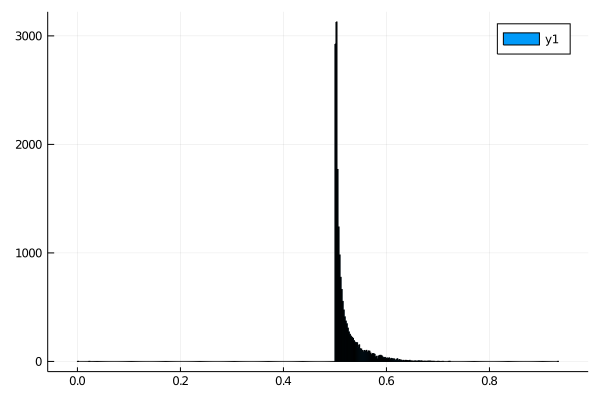

In [24]:
histogram(kaonlikelihoods)